# Numpy 

Fundamental building block of scientific Python.
* Powerful and highly flexible [array class](https://numpy.org/doc/stable/reference/generated/numpy.array.html); your new ubiquitous working unit.
* We will often refer to these objects as $\textit{matrices}$, although this should not be confused with Numpy's less used [matrix class](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)
* Set of most common mathematical utilities (constants, random numbers, linear algebra functions).

When doing multiple identical mathematical or boolean operations you should prefer numpy `array` objects over build-in python datatypes. Numpy performs operations in an optimized manner. You can get rid of many `while` and `for` loops and obtain fast, scalable and readable code by using `array` objects and the functions provided by `numpy` and `scipy`.

## Import

In [105]:
# imports
import numpy as np                 # It will be used a lot, so the shorthand is helpful.
import matplotlib.pyplot as plt    # Same here.

# ipython magic function to show the plots inline in the notebook
%matplotlib inline

## Numpy array basics

A numpy array is a collections of values all of the same type. A numpy array **cannot** change their size once they are created, but they **can** change their shape, i.e., an array will always hold the same number of elements, but their organization into rows and columns may change as desired.
* **ndarray.ndim:** The number of axes/dimensions of an array. The default matrix used for math problems is of dimensionality 2.
* **ndarray.shape:** A tuple of integers indicating the size of an array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim. 
* **ndarray.size:** The total number of elements of the array. This is equal to the product of the elements of shape. 
* **ndarray.dtype:** The data type of the array elements. Defaults to the type of the elements in the array can be set when the array is created.

(*see:* [Numpy basics](https://docs.scipy.org/doc/numpy/user/quickstart.html) )

In [106]:
m = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]], dtype=np.int32) # np.float32, np.float64, np.complex64, np.complex128
print(m)
print(m.dtype)
print(m.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
int32
(3, 3)


### Under the hood
Numpy arrays believe in sharing is caring and will share their data with other arrays. Slicing does NOT return a new array, but instead a *view* on the data of the same array (except when the slice returns a scalar):

In [107]:
s = m[1]
print('BEFORE')
print(s, 'slice', '\n')
print(m, '\n')
s[0] = 0
print('AFTER')
print(s, 'slice' '\n')
print(m, '\n')

BEFORE
[4 5 6] slice 

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

AFTER
[0 5 6] slice

[[1 2 3]
 [0 5 6]
 [7 8 9]] 



You can check whether an array actually owns its data by looking at its flags:

In [108]:
print(m.flags)
print(s.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



## Array creation

In [109]:
# helper function for examples below; plots the graphical depiction of a given numpy array
def show_matrix(X):
    Y = np.array(np.array(X, ndmin=2))  # 1D -> 2D
    vmin = min(np.min(Y), 0)
    vmax = max(np.max(Y), 1)
    fig, ax = plt.subplots(figsize=(4, 3))
    img = ax.imshow(Y, interpolation='none', vmin=vmin, vmax=vmax)
    fig.colorbar(img)
    print(X)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


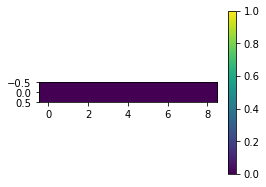

In [110]:
Z = np.zeros(9)
show_matrix(Z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


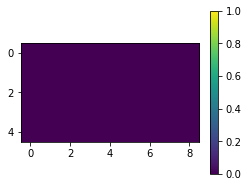

In [111]:
Z = np.zeros((5,9))
show_matrix(Z)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


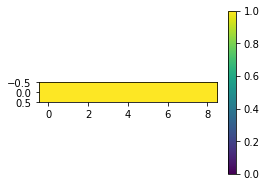

In [112]:
Z = np.ones(9)
show_matrix(Z)

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


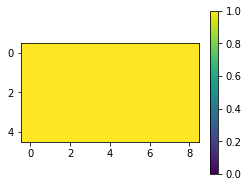

In [113]:
Z = np.ones((5,9))
show_matrix(Z)

[0 0 0 0 0 0 0 0 0]


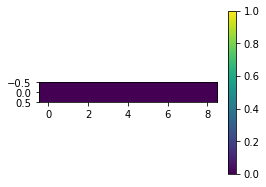

In [114]:
Z = np.array( [0,0,0,0,0,0,0,0,0] )
show_matrix(Z)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


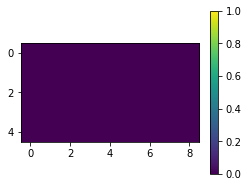

In [115]:
Z = np.array( [[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0]] )
show_matrix(Z)

[0 1 2 3 4 5 6 7 8]


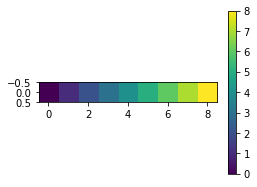

In [116]:
Z = np.arange(9)    # the numpy arange function also allows floating point arguments
show_matrix(Z)

(*see also:* [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html))

[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23 24 25 26]
 [27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44]]


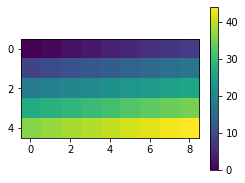

In [117]:
Z = np.arange(5*9).reshape(5,9)
show_matrix(Z)

- Reshape must not change the total number of elements in the array.
- A vector of length ***n*** and a matrix of dimensions (1,***n***) ARE NOT THE SAME THING!

[0.41698987 0.98965851 0.24763556 0.76968523 0.8738182  0.8230475
 0.6613429  0.84289755 0.44249428]


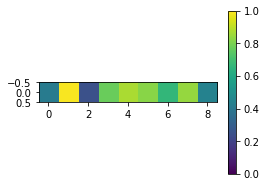

In [118]:
Z = np.random.uniform(0,1,9)  # args: min, max, no. of elements
show_matrix(Z)

[[0.6436227  0.49052151 0.05557708 0.25696779 0.62834767 0.36663994
  0.937704   0.70654308 0.25512238]
 [0.09032745 0.5539158  0.71025557 0.26588008 0.50986325 0.12681315
  0.11031701 0.20165612 0.4783295 ]
 [0.44534442 0.65448317 0.31786706 0.90617398 0.09152772 0.54765753
  0.89524993 0.29743703 0.57207703]
 [0.60762919 0.26761347 0.08521688 0.5401692  0.06535868 0.73519038
  0.3331054  0.64091976 0.13843531]
 [0.21852365 0.12821802 0.48771784 0.70874801 0.61996222 0.48465552
  0.92125651 0.17935331 0.52964077]]


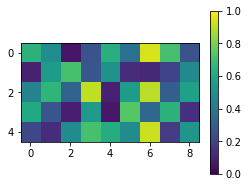

In [119]:
Z = np.random.uniform(0, 1, (5, 9))
show_matrix(Z)

(*see:* [Numpy array creation](https://docs.scipy.org/doc/numpy/user/basics.creation.html) & [Numpy array reshaping](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html))

## Array indexing

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


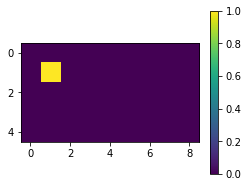

In [120]:
# single element
Z = np.zeros((5, 9))
Z[1,1] = 1
show_matrix(Z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]

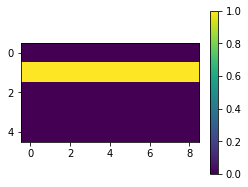

In [121]:
# single row
Z = np.zeros((5, 9))
Z[1,:] = 1
show_matrix(Z)

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]]


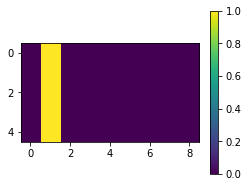

In [122]:
# single column
Z = np.zeros((5, 9))
Z[:,1] = 1
show_matrix(Z)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


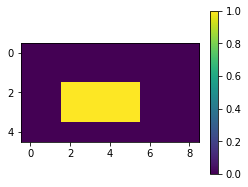

In [123]:
# specific area
Z = np.zeros((5, 9))
Z[2:4,2:6] = 1            # for each dimension format is always: <from:to:step> (with step being optional)
show_matrix(Z)

[[1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1.]]

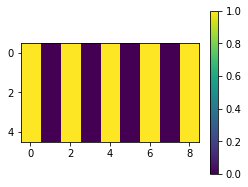

In [124]:
# every second column
Z = np.zeros((5, 9))
Z[:,::2] = 1              # for each dimension format is always: <from:to:step> (with step being optional)
show_matrix(Z)

[0 1 2 3 4 5 6 7 8 9]
>>> Z[-1]:   9
>>> Z[3:-3]: [3 4 5 6]
>>> Z[::-1]: [9 8 7 6 5 4 3 2 1 0]


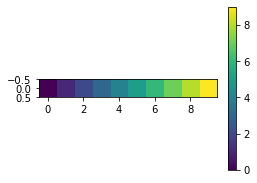

In [125]:
# indices can be negative
Z = np.arange(10)
show_matrix(Z)
print(">>> Z[-1]:  ", Z[-1])       # start indexing at the back
print(">>> Z[3:-3]:", Z[3:-3])     # slice of array center
print(">>> Z[::-1]:", Z[::-1])     # quickly reverse an array

(*see:* [Numpy array slicing](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html))

# Multiplication of arrays

Numpy offers many ways to multiply arrays. If we use python's `*` operator, this performs elementwise multiplication. In the case of 1D arrays of equal size, this can be used as an initial step in calculating the Euclidean inner product:

In [126]:
x=np.array([2,7,8])
y=np.array([5,2,7])
star=x*y
print(star)
inner=np.sum(star)
print(inner)

[10 14 56]
80


However, if we wanted to work out this inner product, Numpy also offers `np.inner()` which is more compact:

In [127]:
np.inner(x,y)

80

For 2D arrays, elementwise multiplication not a common operation. Instead, we are often interested in performing matrix multiplication. Numpy offers different ways to do this. One option is to use `np.dot()`, although due to it's name being related to another operation in linear algebra, we instead recommond `np.matmul()`:

In [128]:
x=np.array([[1,3],
           [2,4]])
y=np.array([[1,2],
           [2,1]])
np.matmul(x,y)

array([[ 7,  5],
       [10,  8]])

`np.matmul()` also has the possibility to use the symbol `@` as a shorthand. It should be noted that the use of this symbol is not fully pythonic ([see here](https://blog.finxter.com/numpy-matmul-operator/)). However, it can make chains of matrix multiplication very compact, and therefore can such computations very readable and transparent. For example:

In [129]:
x@y@y@x@y@x #long chain of matrices multiplied together

array([[ 783, 1875],
       [1170, 2802]])

For arrays with more than two dimensions, `np.matmul()` and `np.dot()` provide [different outputs](https://www.delftstack.com/howto/numpy/numpy-dot-vs-matmul/)

## Broadcasting

Arithmetic operations applied to two Numpy arrays of different dimensions leads to 'broadcasting', i.e., making the shapes compatible to allow the operation if possible (*see:* [Numpy broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) for more details). This includes:

* Adding/subtracting/etc. a single value to a matrix.

In [130]:
x = np.arange(1,10,1)
x += 2
print(x)

[ 3  4  5  6  7  8  9 10 11]


* Adding/subtracting/etc. a column/row vector to a matrix.

In [131]:
x = np.arange(4*3).reshape(4,3)
y = np.arange(10,13,1)
print(x)
print(y)
print(x+y)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[10 11 12]
[[10 12 14]
 [13 15 17]
 [16 18 20]
 [19 21 23]]


* Adding/subtracting/etc. a column and a row vector.

In [132]:
x = np.arange(8)
y = x.reshape(1,8)
#show_matrix(x)
#show_matrix(y)

print(x+y)

[[ 0  2  4  6  8 10 12 14]]


* Elementwise multiplication of arrays with different shapes or dimensionalities. When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when: i) they are equal, or ii) one of them is 1. If these conditions are not met, a ValueError: operands could not be broadcast together exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.

In [133]:
#One dimension matching and one dimension in second array with size 1 -> okay
arr1=np.random.randint(1,10, size=(4,5))
arr2=np.random.randint(1,10, size=(1,5))
print("arr1 is ", arr1)
print("arr2 is ", arr2)

print("product is ", arr1*arr2)

arr1 is  [[3 8 9 3 4]
 [9 7 9 7 9]
 [5 3 9 1 7]
 [7 1 8 5 8]]
arr2 is  [[2 1 9 9 9]]
product is  [[ 6  8 81 27 36]
 [18  7 81 63 81]
 [10  3 81  9 63]
 [14  1 72 45 72]]


In [134]:
#Both dimensions in second array with size 1 -> okay
arr1=np.random.randint(1,10, size=(4,5))
arr2=np.array([[5]])
print(arr1*arr2)

[[35 10 35 40 45]
 [10 20 15 45 35]
 [40  5  5 25 15]
 [25 30  5 30 25]]


In [135]:
# TO UNDERSTAND
#First array has more dimensions than second but trailing dimensions obey both rules
arr1=np.random.randint(1,100, size=(3,5,4,2,6,3))
arr2=np.random.randint(1,100, size=(4,1,6,1))
y=arr1*arr2
print(y.shape)

(3, 5, 4, 2, 6, 3)


In [136]:
#Arrays have an inconsistent dimension
arr1=np.random.randint(1,20, size=(4,3))
arr2=np.random.randint(1,20, size=(4,5))
print(arr1*arr2)

ValueError: operands could not be broadcast together with shapes (4,3) (4,5) 

# Matrix computations

Numpy's [linalg library](https://numpy.org/doc/stable/reference/routines.linalg.html) provides a number of useful matrix and vector operations from linear algebra, which are often useful in many domains of scientific computing. In particular, when dealing with square arrays, one can make use of the eigevalue solver as well as matrix inversion.

In [ ]:
#Eigenvalues and vectors
arr_sym = np.array([[1,2],
                  [2,1]]) #symmetric matrix

vals, vecs = np.linalg.eig(arr_sym)
print("Eigenvalues:\n", vals) #eigenvalues stored as a 1D array
print("Eigenvectors:\n", vecs) #eigenvectors stored as columns in a 2D array

Eigenvalues:
 [ 3. -1.]
Eigenvectors:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
#Matrix inversion
np.linalg.inv(arr_sym)

## Exercises
1. Generate a 5x9 matrix of random integers between 0 and 10.
2. Select a tile-pattern subset of the matrix like this (the resulting matrix can either has reduced shape based on the subset, or it can keep a shape of 5x9):
![Tile pattern](http://i.imgur.com/Cs7N10t.png)
3. ..and like this:
![Tile pattern](http://i.imgur.com/BnGdHle.png)
4. ..and also like this:
![Tile pattern](http://i.imgur.com/i3Lw1Zb.png)
5. Adapt the code for No.3 so that it works with matrices of arbitrary dimensions (if it does not already).
6. Write a function code that perfoms the operation depicted below ([source](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)), i.e. for two arrays with shape (a,1) and (b,1) the result should have shape (a,b).
![Broadcast op](http://i.imgur.com/M3kL9we.png)

7. Make a copy of your matrix from No. 6
8. Find an expression that subtracts the mean of all rows from every row of any given matrix, the shorter the better (one-line is possible). Try the code with the copied matrix.
9. In the matrix from No. 6: 
    1. Reverse the order of the rows of the matrix using a single slice.
    2. Reverse the order of the columns of the matrix using a single slice.
    3. Reverse the order of both the rows and the columns of the matrix using a single slice.
    4. Try evaluation a standard Python conditional on your matrix (e.g. $> 5$). Describe the result in one sentence.
    5. Find an expression that checks if ANY value is larger than 7 using numpy's "any"-function.
    6. Find an expression that checks if ALL values are larger than 2 using numpy's "all"-function.
    7. Use a conditional and boolean/mask indexing to index all even values of your matrix.  
    8. Increment even values by 1.
10. Use numpy's "linspace" function to create a vector of 50 numbers between $-3\pi$ and $3\pi$ in evenly spaced increments.
    1. Display it with the showMatrix function.
    2. Apply a sine function to the vector and display the result, also with the showMatrix function.
    3. Apply a square function to the (original) vector and display the result, also with the showMatrix function.
    

In [162]:
# QN 01
a = np.random.randint(1, 10, size=(5, 9))
print(a)

[[8 4 5 1 4 5 5 5 2]
 [2 5 9 9 9 5 6 2 6]
 [8 1 1 4 1 6 2 2 8]
 [1 1 1 2 7 6 6 2 5]
 [2 7 4 6 7 4 4 5 5]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 9. 0. 5. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 2. 0. 6. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


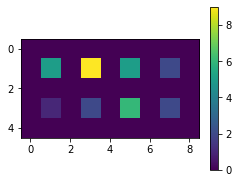

In [163]:
# QN 02
b = np.zeros((5, 9))
b[1::2, 1::2] =  a[1::2, 1::2]

show_matrix(b)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 5. 0. 9. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


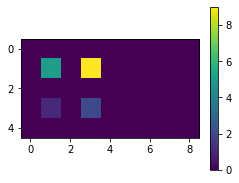

In [164]:
# QN 03
c = np.zeros((5, 9))
c[1:4:2, 1:4:2] = a[1:4:2, 1:4:2]

show_matrix(c)

[[8. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


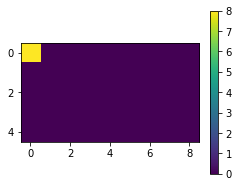

In [165]:
# QN 04
d = np.zeros((5, 9))
d[0::4, 0::8]= a[0::4, 0::8]

show_matrix(d)

In [ ]:
# QN 09

[-9.42477796 -9.04009315 -8.65540833 -8.27072352 -7.8860387  -7.50135389
 -7.11666907 -6.73198426 -6.34729944 -5.96261463 -5.57792981 -5.193245
 -4.80856018 -4.42387537 -4.03919055 -3.65450574 -3.26982093 -2.88513611
 -2.5004513  -2.11576648 -1.73108167 -1.34639685 -0.96171204 -0.57702722
 -0.19234241  0.19234241  0.57702722  0.96171204  1.34639685  1.73108167
  2.11576648  2.5004513   2.88513611  3.26982093  3.65450574  4.03919055
  4.42387537  4.80856018  5.193245    5.57792981  5.96261463  6.34729944
  6.73198426  7.11666907  7.50135389  7.8860387   8.27072352  8.65540833
  9.04009315  9.42477796]
[-3.67394040e-16 -3.75267005e-01 -6.95682551e-01 -9.14412623e-01
 -9.99486216e-01 -9.38468422e-01 -7.40277997e-01 -4.33883739e-01
 -6.40702200e-02  3.15108218e-01  6.48228395e-01  8.86599306e-01
  9.95379113e-01  9.58667853e-01  7.81831482e-01  4.90717552e-01
  1.27877162e-01 -2.53654584e-01 -5.98110530e-01 -8.55142763e-01
 -9.87181783e-01 -9.74927912e-01 -8.20172255e-01 -5.45534901e-01
 -

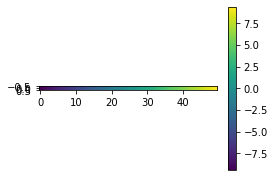

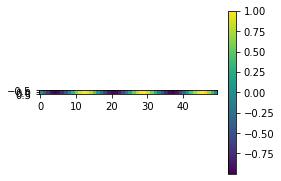

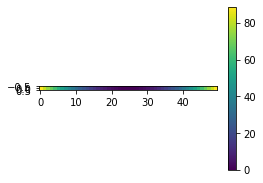

In [ ]:
# QN 10

y = np.linspace((-3 *np.pi), (3 *np.pi), num=50)

# 1
show_matrix(y)

#2
show_matrix(np.sin(y))

#3
show_matrix(np.square(y))